In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = Variable(torch.rand(12, 1))
y = Variable(torch.rand(12, 1))

In [23]:
torch.save(x, "x_data.pt")
torch.save(y, "y_data.pt")

In [3]:
x = torch.load("x_data.pt")
y = torch.load("y_data.pt")

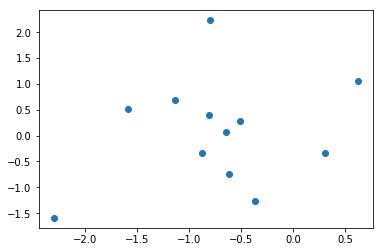

In [4]:
x_np = x.data.numpy()
y_np = y.data.numpy()
plt.plot(x_np, y_np, 'o')

In [10]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)

In [50]:
lr = 1e-3
n_epoch = 10000
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = lr)

In [51]:
for epoch in range(n_epoch):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

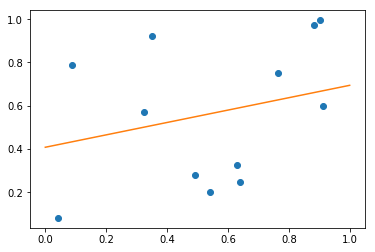

In [52]:
u = np.linspace(0, 1, 100)
u_var = Variable(torch.from_numpy(u)).float().view(-1, 1)
v_var = model(u_var)
v = v_var.data.numpy()
plt.plot(x.data.numpy(), y.data.numpy(), 'o')
plt.plot(u, v)